# Creating your First Multilayer Perceptron Classifier in Python w/ Scikit-Learn
#### Landon Buell - 24 April 2020
#### Adpated & Modified from "Hands on Machine Learning with Scikit-Learn and Tensorflow" by Aurelien Geron
## MLP Classifier Model:

![MLP](MLP.png)

The Multilayer Perceptron is a simple feed-forward architecture for neural networks developed by Frank Rosenblatt in the 1950's. It's composed of layers of "neurons" which we model as columns of floating-point numbers. The entries on each layer-vector object are referred to activations of the neurons in that layer. Information is passed through the network by repeated matrix- vector equations. 

Supose we have a column vector (M x 1) that contains activations for the $l$-th layer. We can produce the $l+1$ layer:
$$ \vec{x}^{(l+1)} = f \Big[ \hat{W}^{(l)} \vec{x}^{(l)} + \vec{b}^{(l)} \Big] $$
where $x^{(l+1)}$ is the activation vector (N x 1) for the next layer, $\hat{W}$ is an (M x N) weighting matrix, $\vec{b}$ is a (N x 1) bias vector (which is just a constant shift, like the intercept in least squares fitting), and $f$ is some activation function.  Note that if the activation function is like the identity matrix, this can all be done with matrix multiplication.

For a network with $L$ layers (L-2 hidden, 1 input, 1 output), this equation is repeated $L-1$ times. The activations in the final layer correspond to the Network's final decision of a particular input sample.

## Rather than build one from the ground up:
Let's explore the scikit-learn (sklearn) implementation of the MLP network model. sklearn is a an open-source Python Module that has within it several smaller submodules that are all built around facilitaing a machine learning work flow for a Python 3.X user. The main documentation page can be found here:
https://scikit-learn.org/stable/

Before we import dive into sklearn, let's import some tools for later


In [1]:
#### PRELIMINARY IMPORTS ####
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# program versions
print(np.__version__)
print(sklearn.__version__)

1.16.5
0.21.3


## The Goal: Build a Digit-Image Classifier Neural Network
For this example, we'll use the classifier variant to create a "Digit-Detector Algorithm" that identifies a digit within a 28 x 28 pixel picture. Each picture is also labeled accordingly.  To make this algorithm, we will use a standard toy data set called "MNIST". This is a data set modified from the US Postal service. You can find more details about it here:
https://en.wikipedia.org/wiki/MNIST_database

To give you an example of what the digits look like, here is an example image (By Josef Steppan - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=64810040)

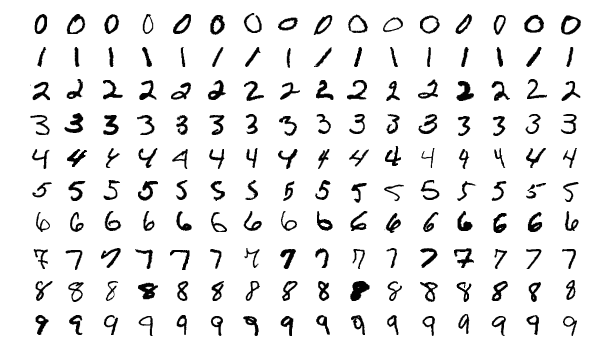


We can actually load in the full data set directly from sklearn! Note: Due to the size of the data set, your computer may take a few seconds to completely run the next cell.

In [2]:
#### LOAD IN RAW DATA SET ####

from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784',version=1,return_X_y=True)

# convert target entries to integers
y = y.astype(np.uint64)

# lets examine the shape of out data:
print("Shape of design matrix:",X.shape)
print("Shape of target vector:",y.shape)

Shape of design matrix: (70000, 784)
Shape of target vector: (70000,)


We can see that out design matrix $X$ is made of up $70,000$ rows by $784$ columns. This corresponds to $70,000$ samples in the data set, each one has 784 features, which are the 28 x 28 pixels (i.e., 28 * 28 = 784). As a 'sanity check', lets examine what a sample looks like:

Image is labeled: 3


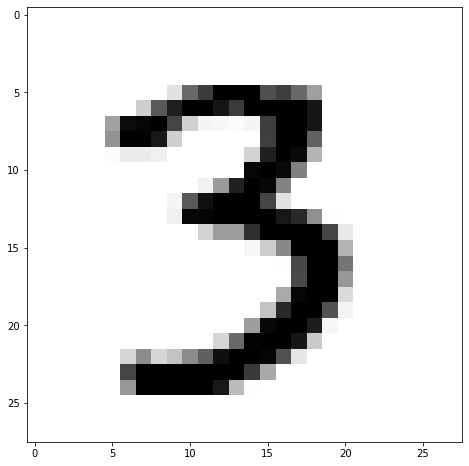

In [3]:
#### EXAMINING A SINGLE SAMPLE OF DATA ####

index = 10000
# lets pull out a single row from the design matrix
digit = X[index].reshape(28,28)
# Lets pull out the corresponding label from the target vector:
label = y[index]
print("Image is labeled:",label)

plt.figure(figsize=(8,8))
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

## Last Step before building our network,
Let's break data into training and testing samples, and we'll begin!

In [4]:
#### SPLIT INTO TRAINING & TESTING SAMPLES ####

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

## Creating an Sklearn MLP Classifier
Now let's actually create a neural network! We'll use the "MLPClassifier" class object from the "neural_network" submodule.

More on sklearn.neural_networks:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

More on the MLPClassifier Object:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

When we create this instance, lets give our network 2 hidden layers, each with 100 neurons. Given our data set, the input layer with have 784 neurons, which we also call "features" (one for each pixel) and 10 output neurons, which we call "classes".
Let's also use the "ReLU" activation function (which is like the identity function y=x, but negative values get set to 0) 

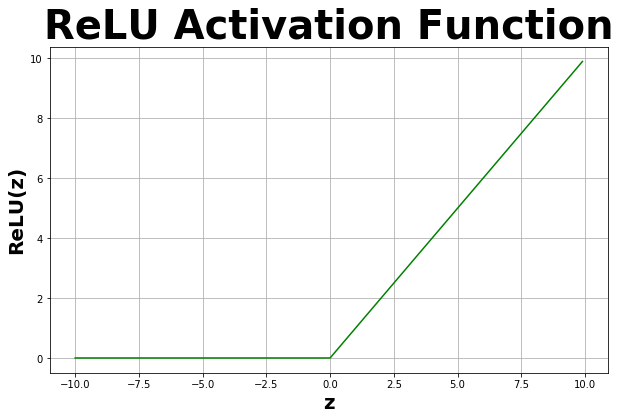

In [5]:
#### VISUALIZE RELU ####

z = np.arange(-10,10,0.1)
relu = np.array([z if z > 0 else 0 for z in z])

plt.figure(figsize=(10,6))
plt.title("ReLU Activation Function",size=40,weight='bold')
plt.xlabel("z",size=20,weight='bold')
plt.ylabel("ReLU(z)",size=20,weight='bold')
plt.plot(z,relu,color='green')
plt.grid()

As a solver method, we will employ "Stochastic Gradient Descent" back propagation method.  The idea behind gradient descent is that the system tries fitting parameters and then moves in the direction of the gradient of some error function/cost function/loss function until it finds a good minimum error state (this is different from least squares fitting where we just jump to the best fit parameters based on on the calculus of min-max problems).   

We will also set the "random_state" parameter to a fixed value so that we produce the same results from computer to computer. This parameter simply adjusts the initial values in the entries of each weighting matrix and bias vector.

In [7]:
#### CREATE SKLEARN NETWORK INSTANCE ####

from sklearn.neural_network import MLPClassifier

My_Network = MLPClassifier(hidden_layer_sizes=(100,100),activation='relu',
                          solver='sgd',random_state=0)

# most of the other Hyper-parameters are taken care of for us!

In [8]:
#### TRAIN THE NEURAL NETWORK CLASSIFIER ####

My_Network = My_Network.fit(X_train,y_train)

C:\Users\Landon\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Training our Classifier
Since the entries in the weighting matrices and bias vectors are initially random, we essentially have a very fancy random number generator! We need to train our model on the data. We do this by "fitting" the neural network with the $X$ training subset and the corresponding $y$ subset (where these are the "right answers", i.e., known values that should match with the $X$ inputs). A network train's itself by adjusting the parameters in the weight matrices & bias vectors to minimize an error function (which we usually call a "loss function").

It's worth noting that given our particular architecture, the loss function of the network, and any decision it makes is a function of ~ 100,000 parameters -- if you sum up the sizes of each weight matrix & bias vector, there are about ~99,610 different 'knobs' and 'dials' that we have to adjust in order to train this model. This means that we are optimizing a function in ~100,000 dimensional space!

More on Stochastic Gradient Descent:
https://en.wikipedia.org/wiki/Stochastic_gradient_descent

The exact details behind back propagation training is a topic for another notebook (or a trip down the google-search rabbit hole), but for now, this is the general idea.

Once agin, due to the volume of this data set and the computational complexity of the training process, the next cell make take a few seconds to fully run. 


## Predicting on a Sample:
We can run a prediction on a single sample from the TESTING data set. This guarantees that our classifier is making  predictions on data that it has never seen before. Sometimes the predictions are accurate and sometimes they aren't. Let's look at another sample:

Image is labeled: 3
Network prediction [3]


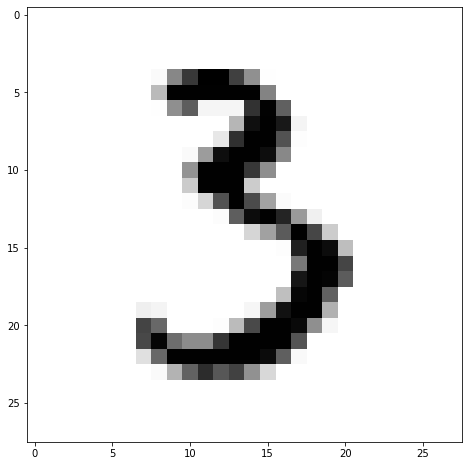

In [11]:
#### PREDICTION A SINGLE SAMPLE OF DATA ####

index = 10001
# lets pull out a single row from the design matrix
sample = X_test[index] 
digit = X_test[index].reshape(28,28)
# Lets pull out the corresponding label from the tagret vector:
label = y_test[index]
print("Image is labeled:",label)
print("Network prediction",My_Network.predict([sample]))

plt.figure(figsize=(8,8))
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

## Under the Hood - Using Linear Algbrea
The exact weighting matrices and bias vectors can be extracted from the trained network instance. We can use these to "manually" re-create this prediction using repeated variation of the equation in the 2nd cell. Lets extract the matrices and manually assign them values.

In [12]:
#### EXACT WEIGHTING MATRICES & BIAS VECTORS ####

weights = My_Network.coefs_
biases = My_Network.intercepts_
print("Number of weighting Matrices:",len(weights))
print("Number of bias Vector:",len(biases))

# we can also examine the shapes
for W,b in zip(weights,biases):
    print("\tMatrix shape:",W.shape)
    print("\tvector shape:",b.shape)

Number of weighting Matrices: 3
Number of bias Vector: 3
	Matrix shape: (784, 100)
	vector shape: (100,)
	Matrix shape: (100, 100)
	vector shape: (100,)
	Matrix shape: (100, 10)
	vector shape: (10,)


To see the linear algebra in action, lets "hard-code" the layers of the forward-propagation system. First, let's assign each matrix and vector it's own variable. And select a sample from the testing designmatic "X_test" to pass through the network manually. 

For more details on the ReLU activation function, please see:
https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7

In [13]:
#### ASSIGN WEIGHTS & BIASES ####

W0,W1,W2 = weights[0],weights[1],weights[2]
b0,b1,b2 = biases[0],biases[1],biases[2]
# define our activation function

def ReLU(vec):
    """ Rectified Linear Unit Activation Function for elements in vector"""
    vec = vec.ravel()
    vec = np.array([z if z > 0 else 0 for z in vec])
    return vec.reshape(-1,1)

# Note that '@' is Python for standard matrix-multiplications

In [15]:
#### FORWARD PASS THROUGH NETWORK ####

# input feature vector, same sample as above
x0 = sample.reshape(-1,1)
print("Input shape",x0.shape)

# 1st hidden layer
a1 = W0.T @ x0 + b0.reshape(-1,1)
x1 = ReLU(a1)
print("Layer 1 shape:",x1.shape)

# 2nd hidden layer
a2 = W1.T @ x1 + b1.reshape(-1,1)
x2 = ReLU(a2)
print("Layer 2 shape:",x2.shape)

# output layer
a3 = W2.T @ x2 + b2.reshape(-1,1)
x3 = ReLU(a3)
print("Layer 3 shape:",x3.shape)

# TIP: Checking the dimesnions of each object is a great way to make sure everything is running properly!

Input shape (784, 1)
Layer 1 shape: (100, 1)
Layer 2 shape: (100, 1)
Layer 3 shape: (10, 1)


We have now sucessfully pased the input vector through our neural network by simply repeating the equation from the 1st cell until we reach the output layer! Notice how along the way we've had to do some transposing and reshaping- this is just a property of how sklearn stores the numpy arrays efficiently. It's yet another reason why we have to very careful about the dimensions of our operators. Finally, let's check our prediction:

In [16]:
#### LAST LAYER ACTIVATIONS ####

output_activations = x3.ravel()

print("Network output for this sample:\n")
print(output_activations,'\n')

# find the INDEX of the maximum activation
max_entry = np.argmax(output_activations)

print("Manually predicted value:",max_entry)
print("Recall predicted value from before:",My_Network.predict([sample]))

Network output for this sample:

[ 4.63472658  1.72969202  6.31787847 13.73206879  0.         10.25234545
  0.          0.          0.87555143  4.10089404] 

Manually predicted value: 3
Recall predicted value from before: [3]


Notice how the final layer has 10 activation values, and each will correspond to a prediction that the neural net observed a given digit. Recall that each one of these is representative of the 10 possible output classes 0 - 9. Since Python is a 0-indexed language, each element in the array then perfectly corresponds to its digit prediction (i.e. array[5] = '5' prediction). In most cases, things won't work out this nicely though. In the case of much deeper and complex networks, this forward process is coded underneath a "for-loop" such that it can be generalized for any number of hidden layers. However, in the words of many great textbooks: "This has been left as an excercise for the reader."

In [32]:
# start with this bits of data:
x0 = sample.reshape(-1,1)
weights = My_Network.coefs_
biases = My_Network.intercepts_
n_layers = len(weights)

for layer in range (n_layers):
    # your code here!
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-32-eb89292c2e9d>, line 10)

## The Cherry on Top: Evaluating the performance over many samples
It's not very practical to run prediction based on single samples, so we can use the same built-in prediction algorithm to run the forward pass on many different samples. Let's run these predictions on the testing subset and compare them to the actual, known values on the test subset (Based on training data set, we are going to make prediction on the unseen).

In [17]:
#### RUN PREDICTIONS ON TEST SAMPLE SUBSET ####

# predict on whole subset
y_predictions = My_Network.predict(X_test)

# Let's compare just a few of them together
print("Predictions:",y_predictions[0:6])
print("Target labels:",y_test[0:6])

Predictions: [0 4 1 2 7 7]
Target labels: [0 4 1 2 7 9]


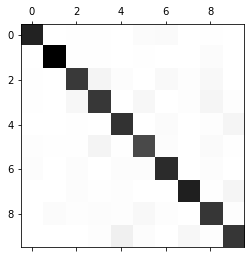

In [18]:
#### BUILD CONFUSION MATRIX ####

import sklearn.metrics as metrics

confusion = metrics.confusion_matrix(y_test,y_predictions,labels=np.arange(0,10,1))

plt.matshow(confusion,cmap=plt.cm.binary)
plt.show()

Above is a "confusion matrix", color coded by the size of each entry. Darker squares have larger values, and lighter squares have lower values. Every row represents a predicted value, and every column is an actual value - thus in our case it is a 10 x 10 matrix. Entries along the main diagonal are indicative of how many samples were predicted to belong to a class, and actually do belong to that class. A good classifier model has a very strong main diagonal - as shown above!

Each index of the confusion matrix, $C$, very specificially:
$$C_{i,j}$$ 
Contains observations that actaully belong to class $i$, and were predicted to be in class $j$.

## We're Finished!
Congrats, you've looked into how Neural Networks behave and make decisions using only linear algebra! In reality, most architectures of networks (and yes, there are many different kinds), are just very clever alpplications of linear algebra and mathematical optimization. 

If you want a more inutitve, start-to-finish description of the math and the training process that we just examined in the notebook, check out Grant Sanderson's Youtube Channel "3Blue1Brown" and his video series on MLP Networks:
https://www.youtube.com/watch?v=aircAruvnKk&t=369s

If you want a book to read that does a very solid job introducing machine learning and neural networks with python, while being very math-light check out these:

"Hands on Machine Learning"
https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/

"Neural Network Projects"
https://www.oreilly.com/library/view/neural-network-projects/9781789138900/

If you want a more theoretical and math-heavy introduction, Check out "Deep Learning":
https://www.deeplearningbook.org/

Otherwise, have fun with it, and learn something new! If you have any questions about this notebook, reach out to me at lhb1007@wildcats.unh.edu.

Cheers!  
Landon Buell